# Doner Dataset Prediction:
We have a dataset of people we approached for doners for our Election campaign

We have their education, job, income, ethnicity

We know high income earners are better to approach for political donations

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [65]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/adult.data"
census = pd.read_csv(file_name)
census.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [66]:
column_names = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'Income']

In [67]:
census = pd.DataFrame(census.values,columns=column_names)
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [68]:
print("no of Rows    :",census.shape[0])
print("no of columns   :",census.shape[1])

no of Rows    : 32560
no of columns   : 15


In [69]:
census.dtypes

age               object
workclass         object
fnlwgt            object
education         object
education-num     object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain      object
capital-loss      object
hours-per-week    object
native-country    object
Income            object
dtype: object

In [70]:
census['age'] = census['age'].astype('int')
census['education-num'] = census['education-num'].astype('int')
census['capital-gain'] = census['capital-gain'].astype('int')
census['capital-loss'] = census['capital-loss'].astype('int')
census['hours-per-week'] = census['hours-per-week'].astype('int')

In [71]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int32
workclass         32560 non-null object
fnlwgt            32560 non-null object
education         32560 non-null object
education-num     32560 non-null int32
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int32
capital-loss      32560 non-null int32
hours-per-week    32560 non-null int32
native-country    32560 non-null object
Income            32560 non-null object
dtypes: int32(5), object(10)
memory usage: 3.1+ MB


In [72]:
census.apply(lambda x: len(x.value_counts()))

age                  73
workclass             9
fnlwgt            21647
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64

In [73]:
census['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [74]:
# Use strip to remove white space characters before and after our data
census['Income'] = census['Income'].str.strip()
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [75]:
# Total number of records
n_records = census.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = census.loc[census['Income'] == '>=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = census[census['Income'] == '<=50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 32560
Individuals making more than $50,000: 0
Individuals making at most $50,000: 24719
Percentage of individuals making more than $50,000: 0.00%


In [76]:
census.isnull().sum().values.sum()

0

In [77]:
census.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [78]:
# Check for nulls
census[census.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income


In [79]:
# Find '?' in dataset column occupation
census[census['occupation'] == " ?"][:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K


In [80]:
census[census['native-country'] == " ?"][:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K


In [81]:
census = census[census['occupation'] != " ?"]
census = census[census['native-country'] != " ?"]

In [82]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [83]:
census['Income'] = census['Income'].apply(lambda x: 0 if x == "<=50K" else 1)

In [84]:
census.Income.value_counts()

0    22653
1     7508
Name: Income, dtype: int64

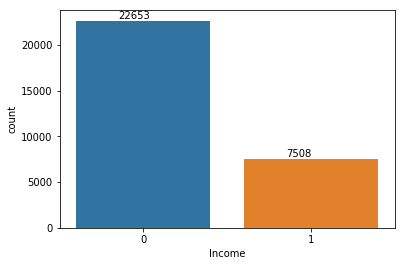

In [85]:
ax = sns.countplot(census["Income"])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [86]:
less_than_50k = census[census['Income'] == 0]
greater_than_50K = census[census['Income'] == 1]

In [87]:
census.drop('fnlwgt',axis=1,inplace=True)

In [88]:
census['marital-status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [89]:
cat_col=[]
for x in census.dtypes.index:
    if census.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical columns :",cat_col)

Categorical columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [90]:
for col in census.columns:
    if census[col].dtype == 'object':
        print(str(col)+ ' , ' + str(census[col].unique()))
        print('-----------------------------------------')
        print(census[col].value_counts())

workclass , [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
-----------------------------------------
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
education , [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
-----------------------------------------
 HS-grad         9840
 Some-college    6678
 Bachelors       5043
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int6

In [91]:
census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
census_minmax_transform = pd.DataFrame(data = census)
census_minmax_transform[numerical] = scaler.fit_transform(census_minmax_transform[numerical])
census_minmax_transform.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States,0
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States,0
2,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States,0
3,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba,0
4,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States,0


In [93]:
census = census_minmax_transform

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in columns:
    census[col] = le.fit_transform(census[col])

In [95]:
census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.452055,4,9,0.800000,2,3,0,4,1,0.0,0.0,0.122449,38,0
1,0.287671,2,11,0.533333,0,5,1,4,1,0.0,0.0,0.397959,38,0
2,0.493151,2,1,0.400000,2,5,0,2,1,0.0,0.0,0.397959,38,0
3,0.150685,2,9,0.800000,2,9,5,2,0,0.0,0.0,0.397959,4,0
4,0.273973,2,12,0.866667,2,3,5,4,0,0.0,0.0,0.397959,38,0


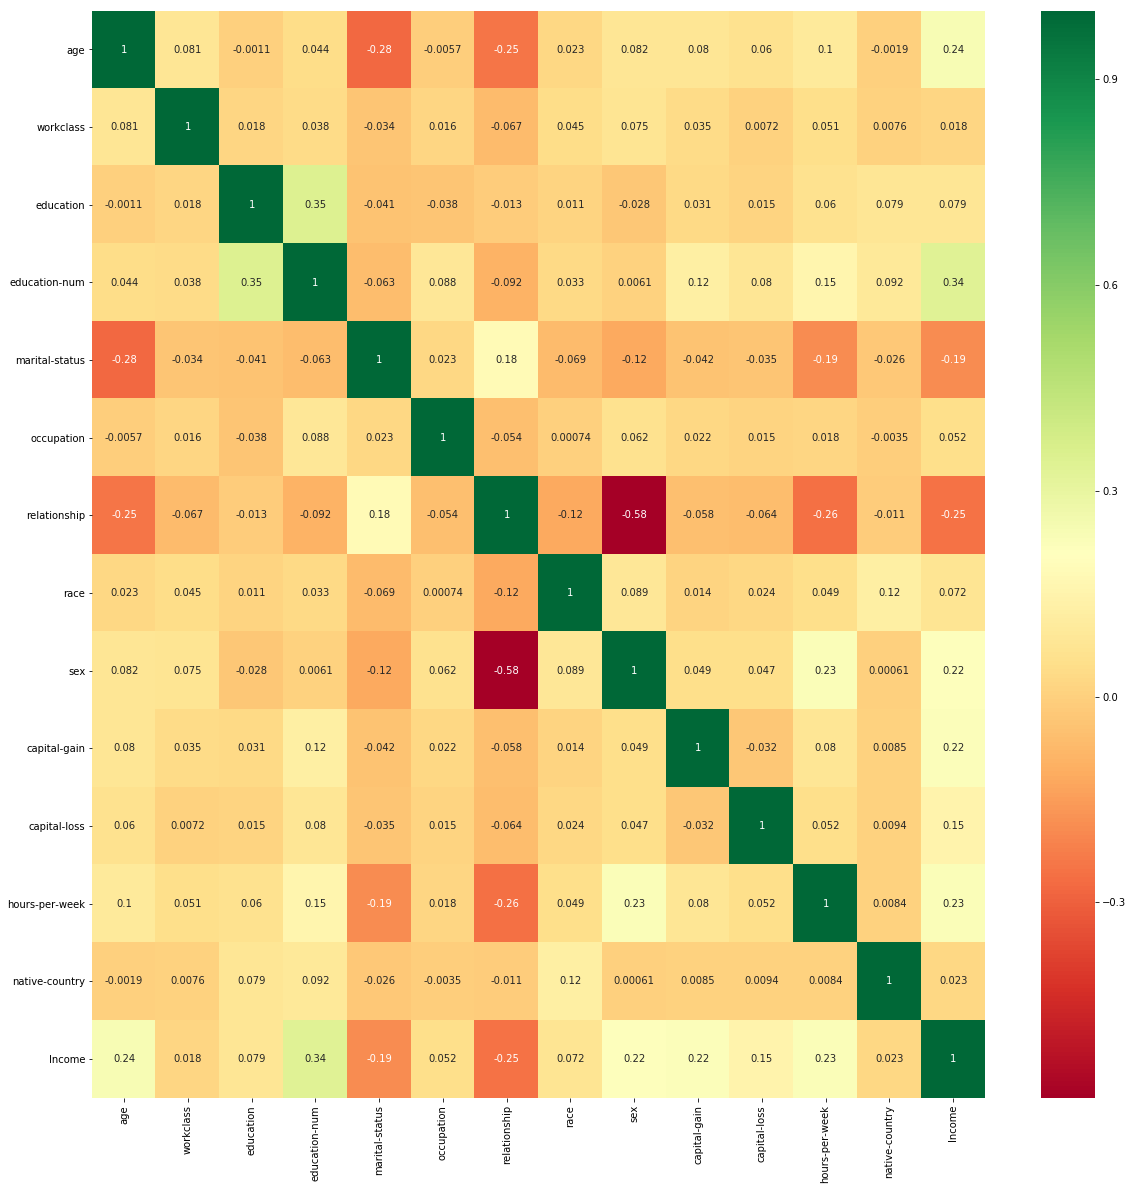

In [96]:
corrmat = census.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(census[top_corr_features].corr(),annot=True,cmap="RdYlGn")

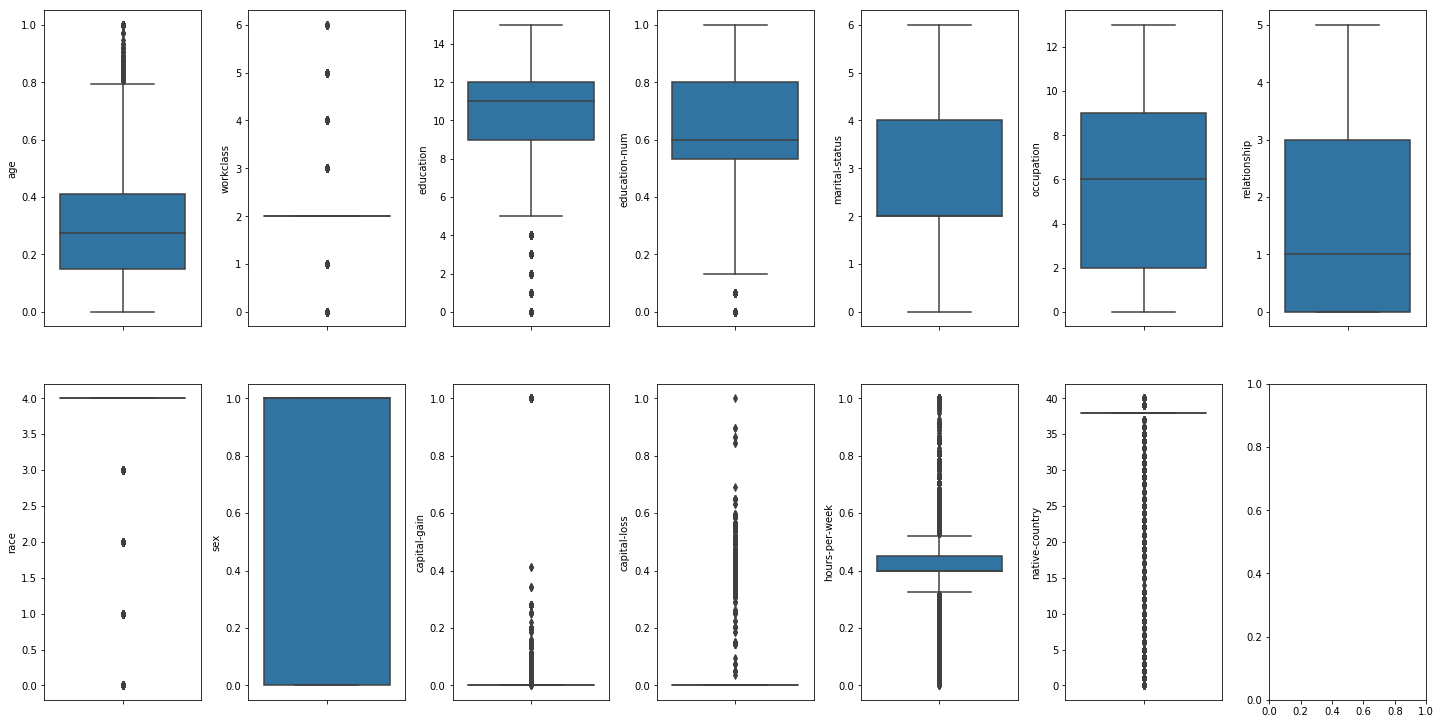

In [106]:
# Checking For Outliers
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in census.items():
    if col != 'Income':
        sns.boxplot(y=col, data=census, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Outliers are Present in ample amount

In [109]:
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(census))
print(census.shape)
census_final = census.loc[(zscore<3).all(axis=1)]
print(census_final.shape)

(30161, 14)
(26046, 14)


In [110]:
census = census_final

In [111]:
census[:5]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.452055,4,9,0.800000,2,3,0,4,1,0.0,0.0,0.122449,38,0
1,0.287671,2,11,0.533333,0,5,1,4,1,0.0,0.0,0.397959,38,0
2,0.493151,2,1,0.400000,2,5,0,2,1,0.0,0.0,0.397959,38,0
4,0.273973,2,12,0.866667,2,3,5,4,0,0.0,0.0,0.397959,38,0
5,0.438356,2,6,0.266667,3,7,1,2,0,0.0,0.0,0.153061,22,0


In [112]:
X = census.drop('Income',axis=1)
y = census['Income']
print(X.shape)
print(y.shape)

(26046, 13)
(26046,)


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
print(X_train.shape)
print(y_train.shape)

(20836, 13)
(20836,)


In [115]:
print(X_test.shape)
print(y_test.shape)

(5210, 13)
(5210,)


In [116]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

accuracy_score: 0.8182341650671785
[[3760  246]
 [ 701  503]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4006
           1       0.67      0.42      0.52      1204

    accuracy                           0.82      5210
   macro avg       0.76      0.68      0.70      5210
weighted avg       0.80      0.82      0.80      5210



Text(0.5, 15.0, 'Predicted label')

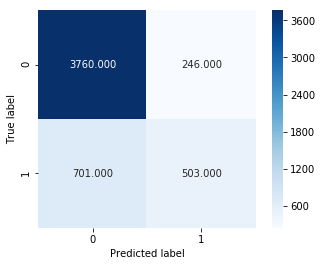

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, 
            cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# AUC and ROC Curve

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [48]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [49]:
y_pred_prob

array([0.23201619, 0.40688915, 0.04772039, ..., 0.28595817, 0.04817755,
       0.0168759 ])

In [50]:
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)

In [51]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99725412, 0.99775337,
       1.        ])

In [52]:
fpr

array([0.00000000e+00, 8.30564784e-04, 8.30564784e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [53]:
thresholds

array([1.99986141e+00, 9.99861412e-01, 9.97742481e-01, ...,
       1.62243254e-03, 1.60650202e-03, 9.80302800e-04])

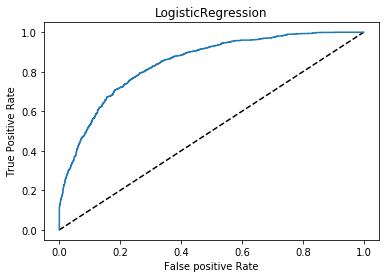

In [54]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='LogisticRegression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.show()